In [112]:
# Impoort libraries
import pandas as pd
import numpy as np
import regex as re
import ast
import networkx as nx
import  matplotlib.pyplot as plt
import statistics
from itertools import combinations
from collections import defaultdict, Counter

In [2]:
# Load the graphs
G_before = nx.read_graphml("G_before.graphml")
G_after = nx.read_graphml("G_after.graphml")

In [102]:
# Load datasets
nodes_before = pd.read_csv("nodes_before.csv")
nodes_after = pd.read_csv("nodes_after.csv")
edges_before = pd.read_csv("edges_before.csv")
edges_after = pd.read_csv("edges_after.csv")

# Analysis

## Identify Triadic Closures

In [4]:
# Look for pairs of nodes in the graph that share a common neighbor
def find_triadic_closure(graph):
    potential_closures = []
    for node in graph.nodes():
        neighbors = set(graph.neighbors(node))
        for n1 in neighbors:
            for n2 in neighbors:
                if n1 != n2 and not graph.has_edge(n1, n2):
                    potential_closures.append((n1, node, n2))
    return potential_closures

closure_before = find_triadic_closure(G_before)
closure_after = find_triadic_closure(G_after)

In [53]:
closure_before

[('Revol', 'Bad Bunny', 'Rvssian'),
 ('Revol', 'Bad Bunny', 'Tempo'),
 ('Revol', 'Bad Bunny', 'Mambo Kingz'),
 ('Revol', 'Bad Bunny', 'Daddy Yankee'),
 ('Revol', 'Bad Bunny', 'Farruko'),
 ('Revol', 'Bad Bunny', 'Ñengo Flow'),
 ('Revol', 'Bad Bunny', 'DJ Luian'),
 ('Revol', 'Bad Bunny', 'Mark B.'),
 ('Revol', 'Bad Bunny', 'Becky G'),
 ('Revol', 'Bad Bunny', 'Maluma'),
 ('Revol', 'Bad Bunny', 'Amenazzy'),
 ('Revol', 'Bad Bunny', 'J Balvin'),
 ('Revol', 'Bad Bunny', 'Yandel'),
 ('Revol', 'Bad Bunny', 'Víctor Manuelle'),
 ('Revol', 'Bad Bunny', 'Almighty'),
 ('Revol', 'Bad Bunny', 'Lary Over'),
 ('Revol', 'Bad Bunny', 'Darell'),
 ('Revol', 'Bad Bunny', 'Jory Boy'),
 ('Revol', 'Bad Bunny', 'Justin Quiles'),
 ('Revol', 'Bad Bunny', 'Kosa'),
 ('Revol', 'Bad Bunny', 'Nicky Jam'),
 ('Revol', 'Bad Bunny', 'EZ El Ezeta'),
 ('Revol', 'Bad Bunny', 'Wisin'),
 ('Revol', 'Bad Bunny', 'Noriel'),
 ('Revol', 'Bad Bunny', 'Anuel AA'),
 ('Revol', 'Bad Bunny', 'Gigolo Y La Exce'),
 ('Revol', 'Bad Bunny', 'S

## Analyse Influence of Prominent Artists

In [7]:
## CODE TAKES TOO LONG!
# Calculate centrality measures for each artist - BEFORE
degree_centrality_before = nx.degree_centrality(G_before)
betweenness_before = nx.betweenness_centrality(G_before)

In [12]:
## CODE TAKES TOO LONG!
# Calculate centrality measures for each artist - AFTER
degree_centrality_after = nx.degree_centrality(G_after)
betweenness_after = nx.betweenness_centrality(G_after)

In [64]:
# Examine if influential artists are more likely to be involved in potential triadic closures - BEFORE
# mean_before = statistics.mean(degree_centrality_before.values())

influential_triads_before = []
for triad in closure_before:
    centrality_scores = [degree_centrality_before[node] for node in triad]
    if any(score > 0.005 for score in centrality_scores):
        influential_triads_before.append(triad)
        
influential_triads_before

[('B Praak', 'Arijit Singh', "Suzanne D'Mello"),
 ('B Praak', 'Arijit Singh', 'Shashwat Singh'),
 ('B Praak', 'Arijit Singh', 'Zack Knight'),
 ('B Praak', 'Arijit Singh', 'Sonu Nigam'),
 ('B Praak', 'Arijit Singh', 'Neeraj Shridhar'),
 ('B Praak', 'Arijit Singh', 'Sachin-Jigar'),
 ('B Praak', 'Arijit Singh', 'Khushboo Grewal'),
 ('B Praak', 'Arijit Singh', 'Rahul Vaidya'),
 ('B Praak', 'Arijit Singh', 'Raftaar'),
 ('B Praak', 'Arijit Singh', 'Antara Mitra'),
 ('B Praak', 'Arijit Singh', 'Neeti Mohan'),
 ('B Praak', 'Arijit Singh', 'Nihira Joshi Deshpande'),
 ('B Praak', 'Arijit Singh', 'Shruti Pathak'),
 ('B Praak', 'Arijit Singh', 'Saim Bhat'),
 ('B Praak', 'Arijit Singh', 'Asees Kaur'),
 ('B Praak', 'Arijit Singh', 'Roach Killa'),
 ('B Praak', 'Arijit Singh', 'Jawad Ahmad'),
 ('B Praak', 'Arijit Singh', 'Shefali Alvares'),
 ('B Praak', 'Arijit Singh', 'Farhan Sabri'),
 ('B Praak', 'Arijit Singh', 'Priya Saraiya'),
 ('B Praak', 'Arijit Singh', 'DJ Paroma'),
 ('B Praak', 'Arijit Singh'

In [65]:
# Examine if influential artists are more likely to be involved in potential triadic closures - AFTER
# mean_after = statistics.mean(degree_centrality_after.values())

influential_triads_after = []
for triad in closure_after:
    centrality_scores = [degree_centrality_after[node] for node in triad]
    if any(score > 0.005 for score in centrality_scores):
        influential_triads_after.append(triad)
        
influential_triads_after

[('Farruko', 'Bad Bunny', 'Víctor Manuelle'),
 ('Farruko', 'Bad Bunny', 'Nacho'),
 ('Farruko', 'Bad Bunny', 'Yaviah'),
 ('Farruko', 'Bad Bunny', 'ABRA'),
 ('Farruko', 'Bad Bunny', 'Pablo Chill-E'),
 ('Farruko', 'Bad Bunny', 'Eladio Carrion'),
 ('Farruko', 'Bad Bunny', 'Trap Capos'),
 ('Farruko', 'Bad Bunny', 'Baby Rasta'),
 ('Farruko', 'Bad Bunny', 'Marciano Cantero'),
 ('Farruko', 'Bad Bunny', 'Will Smith'),
 ('Farruko', 'Bad Bunny', 'Wisin & Yandel'),
 ('Farruko', 'Bad Bunny', 'Mora'),
 ('Farruko', 'Bad Bunny', 'Nitti Gritti'),
 ('Farruko', 'Bad Bunny', 'Diplo'),
 ('Farruko', 'Bad Bunny', 'Ivy Queen'),
 ('Farruko', 'Bad Bunny', 'Cardi B'),
 ('Farruko', 'Bad Bunny', 'Pj Sin Suela'),
 ('Farruko', 'Bad Bunny', 'Mr Eazi'),
 ('Farruko', 'Bad Bunny', 'Dua Lipa'),
 ('Farruko', 'Bad Bunny', 'Jhay Cortez'),
 ('Farruko', 'Bad Bunny', 'Quavo'),
 ('Farruko', 'Bad Bunny', 'Marc Anthony'),
 ('Farruko', 'Bad Bunny', 'Shootter Ledo'),
 ('Farruko', 'Bad Bunny', 'KHEA'),
 ('Farruko', 'Bad Bunny', 'Nat

## Musical Genre Analysis in Triads

In [70]:
# Compare genre similarities within triads
def genre_similarity(triad, graph):
    try:
        genres = [graph.nodes[node]['genres'] for node in triad]
        genres = [eval(g) if isinstance(g, str) and g.startswith('[') else g for g in genres]
        intersection = set(genres[0]).intersection(set(genres[1]), set(genres[2]))
        union = set(genres[0]).union(set(genres[1]), set(genres[2]))
        jaccard_index = len(intersection) / len(union) if union else 0
    except Exception as e:
        print(f"Error processing triad {triad}: {e}")
        jaccard_index = None
    return jaccard_index

In [71]:
# Calculate genre similarity for each triad
genre_similarities_before = {triad: genre_similarity(triad, G_before) for triad in influential_triads_before}
genre_similarities_after = {triad: genre_similarity(triad, G_after) for triad in influential_triads_after}

# Results

### Evolution of Triadic Closures

In [79]:
n_before = len(closure_before)
n_after = len(closure_after)

print("Number of Triadic Closures Before:", n_before)
print("Number of Triadic Closures After:", n_after)
print("Increase:", round(((n_after - n_before) / n_before) * 100 - 100, 2), "%")

Number of Triadic Closures Before: 701158
Number of Triadic Closures After: 1739944
Increase: 48.15 %


 There's a substantial growth in potential collaborative connections among artists on Spotify.

### Influence of Prominent Artists in Triads

In [80]:
n_before = len(influential_triads_before)
n_after = len(influential_triads_after)

print("Number of Triads Involving Influential Artists Before:", n_before)
print("Number of Triads Involving Influential Artists After:", n_after)
print("Increase:", round(((n_after - n_before) / n_before) * 100 - 100, 2), "%")

Number of Triads Involving Influential Artists Before: 78370
Number of Triads Involving Influential Artists After: 415250
Increase: 329.86 %


The significant increase in triads involving influential artists suggests these individuals play a key role in the network's evolution.

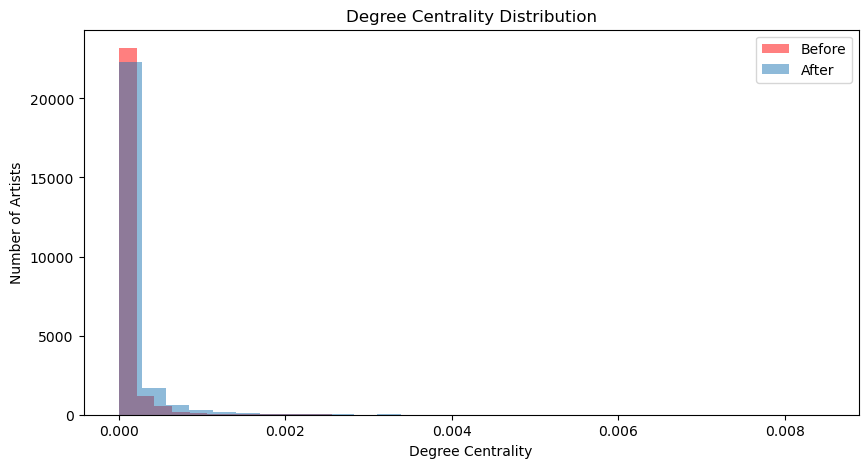

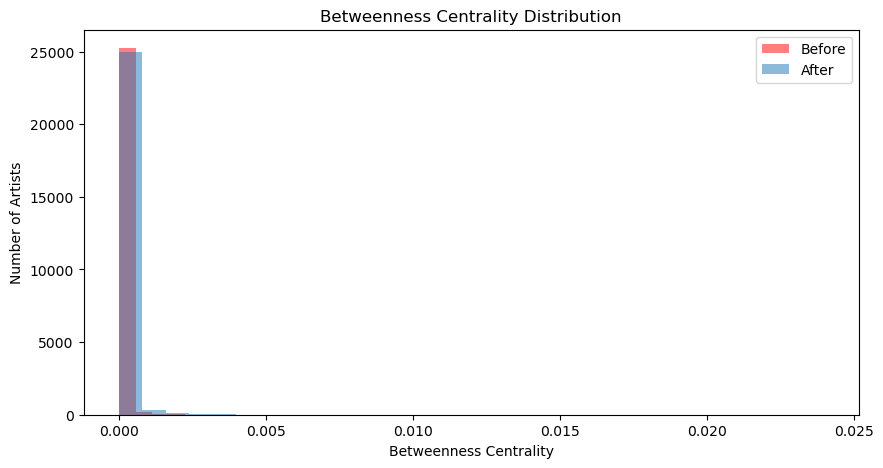

In [86]:
# Plot distribution of degree and betweenness centralities
import matplotlib.pyplot as plt

# Degree Centrality Distribution
plt.figure(figsize=(10, 5))
plt.hist(degree_centrality_before.values(), bins=30, alpha=0.5, label='Before', color='red')
plt.hist(degree_centrality_after.values(), bins=30, alpha=0.5, label='After')
plt.title("Degree Centrality Distribution")
plt.xlabel("Degree Centrality")
plt.ylabel("Number of Artists")
plt.legend()
plt.show()

# Betweenness Centrality Distribution
plt.figure(figsize=(10, 5))
plt.hist(betweenness_before.values(), bins=30, alpha=0.5, label='Before', color='red')
plt.hist(betweenness_after.values(), bins=30, alpha=0.5, label='After')
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Artists")
plt.legend()
plt.show()

**Degree Centrality Distribution:**
Most artists have a similar, low degree of connectivity in the network before and after, and only a few artists have a high number of collaborations.This underscores the importance of identifying athese highly connected artists, as they are likely to be key influencers who can attract listeners and drive trends on the platform.

**Betweenness Centrality Distribution:**
The distribution of betweenness centrality remains relatively unchanged, showing that the artists who act as bridges in the network have maintained their roles. This consistency provides an opportunity to continue to develop relationships with them.

### Genre Similarity Analysis

In [83]:
# Analyze the genre similarities within triads
avg_similarity_before = sum(genre_similarities_before.values()) / len(genre_similarities_before)
avg_similarity_after = sum(genre_similarities_after.values()) / len(genre_similarities_after)

print("Average Genre Similarity Before:", avg_similarity_before)
print("Average Genre Similarity After:", avg_similarity_after)
print("Decrease:", round(((avg_similarity_after - avg_similarity_before) / avg_similarity_before) * 100 - 100, 2), "%")

Average Genre Similarity Before: 0.16685943910202272
Average Genre Similarity After: 0.12568957291950256
Decrease: -124.67 %


The marked decrease in genre similarity within triads after the observed period indicates a trend towards more cross-genre collaborations.

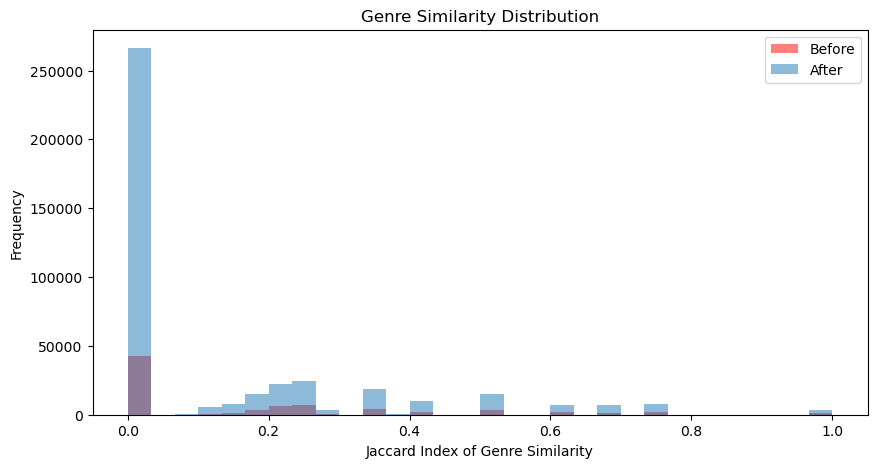

In [88]:
# Plot distribution of genre similarities
plt.figure(figsize=(10, 5))
plt.hist(list(genre_similarities_before.values()), bins=30, alpha=0.5, label='Before', color='red')
plt.hist(list(genre_similarities_after.values()), bins=30, alpha=0.5, label='After')
plt.title("Genre Similarity Distribution")
plt.xlabel("Jaccard Index of Genre Similarity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Notable shift toward lower genre similarity, indicating a trend toward more genre collaborations. This presents a strategic advantage to create more richer in content playlists and promote broader musical exploration, potentially attracting a more diverse audience to the platform.

### Genre Recommendation

In [114]:
def get_genre_pairs(graph, triads):
    genre_pairs = defaultdict(int)
    
    for triad in triads:
        genres_in_triad = [set(eval(graph.nodes[node]['genres'])) for node in triad]

        for genre_set in genres_in_triad:
            for pair in combinations(genre_set, 2):
                sorted_pair = tuple(sorted(pair))
                genre_pairs[sorted_pair] += 1
    
    return genre_pairs

genre_pairs_before = get_genre_pairs(G_before, closure_before)
genre_pairs_after = get_genre_pairs(G_after, closure_after)

# Find difference in genre pair frequencies 
genre_pair_difference = {pair: genre_pairs_after[pair] - genre_pairs_before.get(pair, 0) 
                         for pair in genre_pairs_after}

# Sort pairs by the greatest positive difference
recommended_genre_pairs = sorted(genre_pair_difference.items(), key=lambda x: x[1], reverse=True)

# Print out the top 25 recommended genre pairs to combine
for genre_pair, difference in recommended_genre_pairs[:250]:
    print(f"Recommended Genre Pair: {genre_pair}, Increase in Collaborations: {difference}")

Recommended Genre Pair: ('desi pop', 'modern bollywood'), Increase in Collaborations: 609188
Recommended Genre Pair: ('filmi', 'modern bollywood'), Increase in Collaborations: 504756
Recommended Genre Pair: ('desi pop', 'filmi'), Increase in Collaborations: 480946
Recommended Genre Pair: ('reggaeton', 'trap latino'), Increase in Collaborations: 298308
Recommended Genre Pair: ('latin hip hop', 'reggaeton'), Increase in Collaborations: 156410
Recommended Genre Pair: ('latin hip hop', 'trap latino'), Increase in Collaborations: 150402
Recommended Genre Pair: ('desi hip hop', 'desi pop'), Increase in Collaborations: 134424
Recommended Genre Pair: ('reggaeton flow', 'trap latino'), Increase in Collaborations: 129164
Recommended Genre Pair: ('reggaeton', 'reggaeton flow'), Increase in Collaborations: 123522
Recommended Genre Pair: ('desi hip hop', 'modern bollywood'), Increase in Collaborations: 94348
Recommended Genre Pair: ('dance pop', 'pop'), Increase in Collaborations: 81026
Recommended